In [1]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/fede/miniconda2/etc/jupyter/nbconfig/"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("notebook", dict(livereveal={
    "theme": "simple",
    "transition": "none",
    "start_slideshow_at": "selected",
    'scroll': True
}));

# Notebooks and Plotly: tools for presentations
###### A meta-presentation by Federico Tomasi

### Reasons for Jupyter Notebooks

1. almost like an IDE, supporting multiple languages, eg.
<ul>
  <li class="fragment">Ju (Julia)</li>
    <li class="fragment">Py (Python)</li>
    <li class="fragment"><del>(te)</del>R (R-language)</li>
</ul>

and many more

2. easy to code and display outputs

<img src="https://cdn-images-1.medium.com/max/1600/1*NnjISpzZtpy5TOurg0S89A.gif">

 3. see function signature and help
 
 <img src="https://camo.githubusercontent.com/d9690b90f0c86c1cf08ddf52beb8f9fe379a1dee/687474703a2f2f672e7265636f726469742e636f2f4b7955513569754a64762e676966">

In [2]:
import numpy as np

help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K'

<blockquote>
The reason for Jupyter’s immense success is it excels in a form of programming called “literate programming”. This type of programming emphasizes a prose first approach where exposition with human-friendly text is punctuated with code blocks. It excels at demonstration, research, and teaching objectives especially for science.
</blockquote>

<img src="http://community.datacamp.com.s3.amazonaws.com/community/production/ckeditor_assets/pictures/202/content_jupyternotebook7.gif">

<blockquote>
Literate programming allows users to formulate and describe their thoughts with prose, supplemented by mathematical equations, as they prepare to write code blocks.
</blockquote>

$\LaTeX$ code!
$$x = \frac{\sqrt{\rho}}{2\pi^2} $$

Jupyter as an IDE: `nbextensions`
<ul>
    <li class="fragment">LaTeX environments <code>itemize</code>, <code>definition</code> etc</li>
    <li class="fragment">Table of contents</li>
    <li class="fragment"><code>autopep8</code>, <code>isort</code> to format code</li>
    <li class="fragment">variable inspector!</li>
</ul>

<img src="http://localhost:8888/nbextensions/varInspector/demo.gif"></img>

## Plotly for plots

In [3]:
%matplotlib inline 
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.io as pio

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Generate our first data.

In [19]:
x =  np.linspace(np.pi, 3*np.pi, 50)
sinx = np.sin(x)
logx = np.log(x)

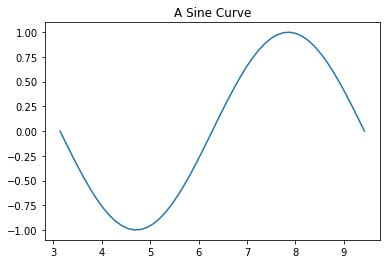

In [26]:
# Creating the matplotlib graph..
f, ax = plt.subplots()
ax.plot(x, sinx) # marker='o'
ax.set_title('A Sine Curve');

Our first approach to `plotly`:<br> conversion from `matplotlib`

plotly_fig = tls.mpl_to_plotly(f)
py.iplot(plotly_fig, filename='sine-plot')

Now let's go back and change something, like a marker. Directly from the slides!

Adding another curve

In [7]:
plotly_fig.add_trace( dict(x=x, y=logx, type='scatter', mode='lines') )

plotly_fig['layout']['title'] = 'Sine and Logarithmic Curve'

plotly_fig['layout']['xaxis1']['showgrid'] = True
plotly_fig['layout']['xaxis1']['autorange'] = True

plotly_fig['layout']['yaxis1']['showgrid'] = True
plotly_fig['layout']['yaxis1']['autorange'] = True

In [8]:
py.iplot(plotly_fig, filename='sine-and-logarithmic-plot')

More figures!

In [9]:
import plotly.plotly
fig = plotly.plotly.get_figure('https://plot.ly/~jackp/8715', raw=True)
iplot(fig)

## Plotly from scratch
Let's draw something directly in `plotly`

In [10]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

In [11]:
fig = go.Figure()
fig.add_scatter(x=x, y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

And to save, simply

In [12]:
pio.write_image(fig, 'fig1.png') # or jpg, pdf, svg, etc